<a href="https://colab.research.google.com/github/amanscodings/CS131/blob/main/a4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Scikit-learn imports
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing

In [ ]:
!pip install ucimrepo

ERROR: Could not find a version that satisfies the requirement ucimrepo (from versions: none)
ERROR: No matching distribution found for ucimrepo


In [ ]:
# Replace with your actual file path if it's different
WHITE_WINE_CSV = '/content/winequality-white.csv'
white_wine_df = pd.read_csv(WHITE_WINE_CSV, sep=';')


In [41]:
#question 1
print(white_wine_df.astype(int).describe())


       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.407105          0.000408     0.001429        5.951817   
std         0.889922          0.020205     0.037781        5.056241   
min         3.000000          0.000000     0.000000        0.000000   
25%         6.000000          0.000000     0.000000        1.000000   
50%         6.000000          0.000000     0.000000        5.000000   
75%         7.000000          0.000000     0.000000        9.000000   
max        14.000000          1.000000     1.000000       65.000000   

       chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count     4898.0          4898.000000           4898.000000  4898.000000   
mean         0.0            35.302572            138.357901     0.019396   
std          0.0            17.000040             42.493627     0.137925   
min          0.0             2.000000              9.000

In [43]:
# 2 Calculate the correlation matrix
correlation_matrix = white_wine_df.corr()
print(correlation_matrix)


                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.022697     0.289181   
volatile acidity          -0.022697          1.000000    -0.149472   
citric acid                0.289181         -0.149472     1.000000   
residual sugar             0.089021          0.064286     0.094212   
chlorides                  0.023086          0.070512     0.114364   
free sulfur dioxide       -0.049396         -0.097012     0.094077   
total sulfur dioxide       0.091070          0.089261     0.121131   
density                    0.265331          0.027114     0.149503   
pH                        -0.425858         -0.031915    -0.163748   
sulphates                 -0.017143         -0.035728     0.062331   
alcohol                   -0.120881          0.067718    -0.075729   
quality                   -0.113663         -0.194723    -0.009209   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity    

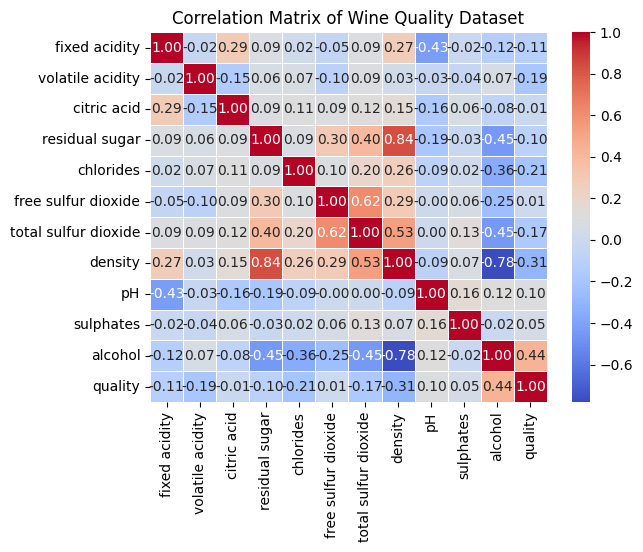

In [52]:
# 2 Plot a histogram of the target value (quality).
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Wine Quality Dataset')
plt.show()


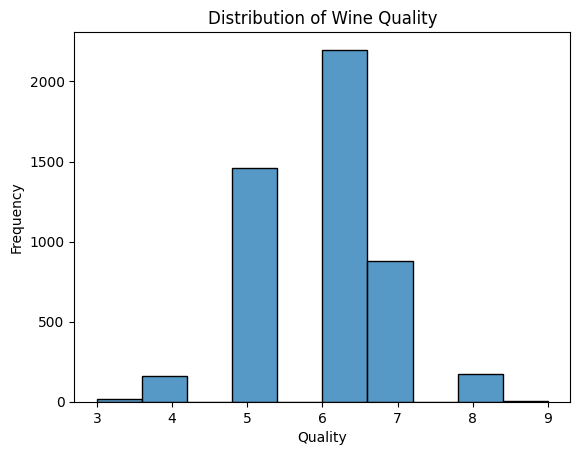

In [46]:
#question 3
sns.histplot(white_wine_df['quality'], bins=10, kde=False)
plt.title('Distribution of Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Frequency')
plt.show()

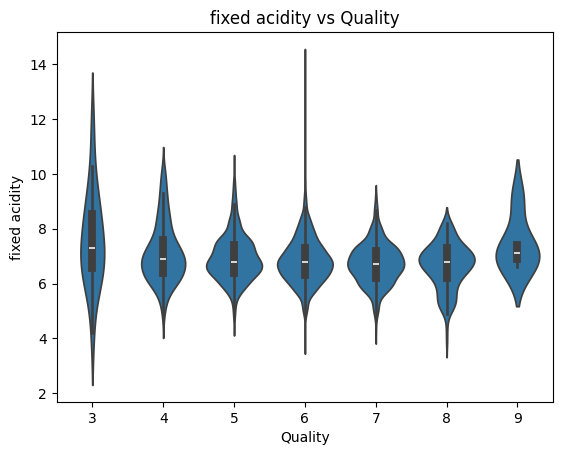

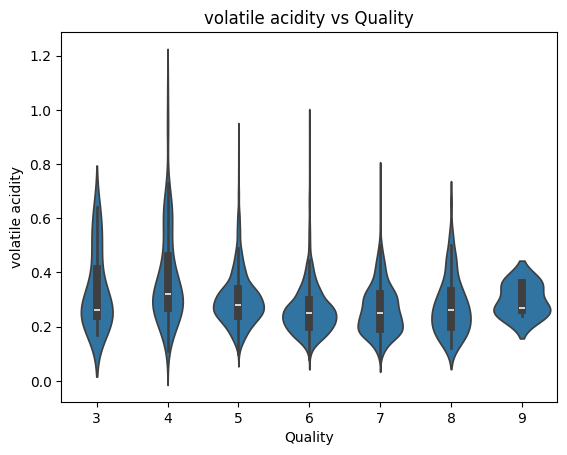

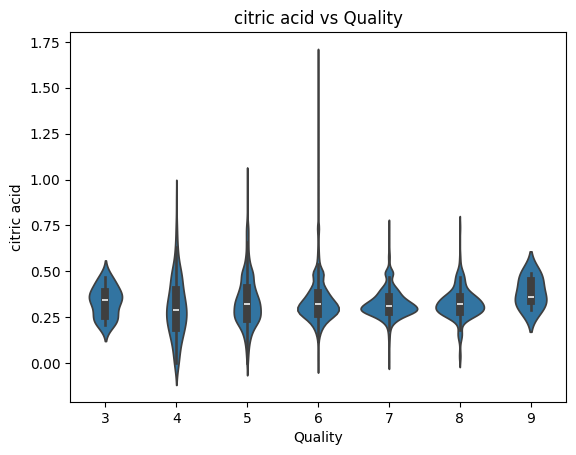

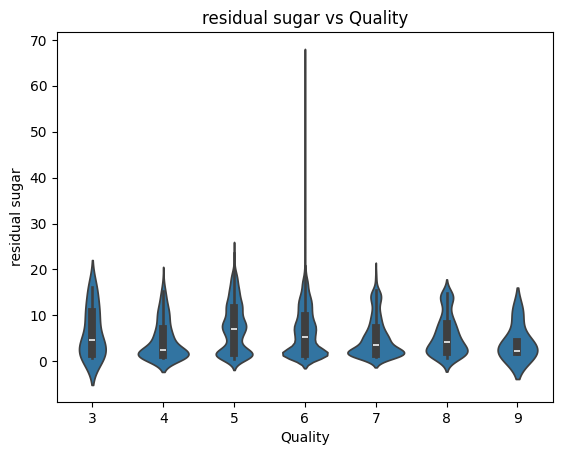

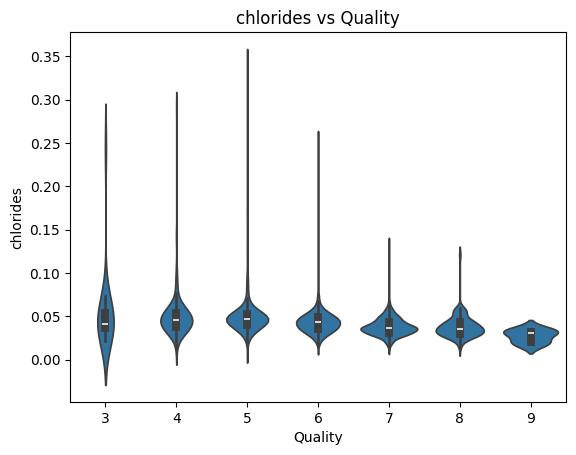

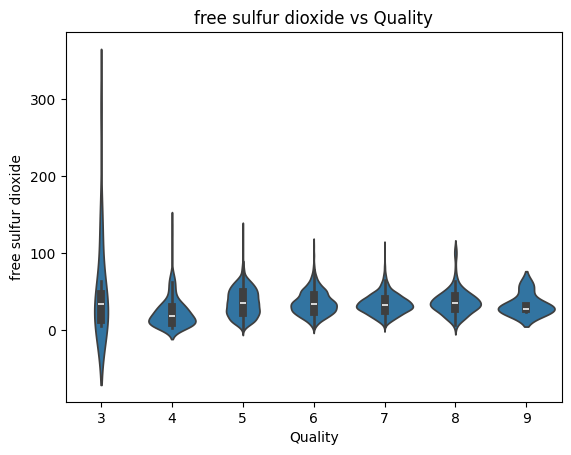

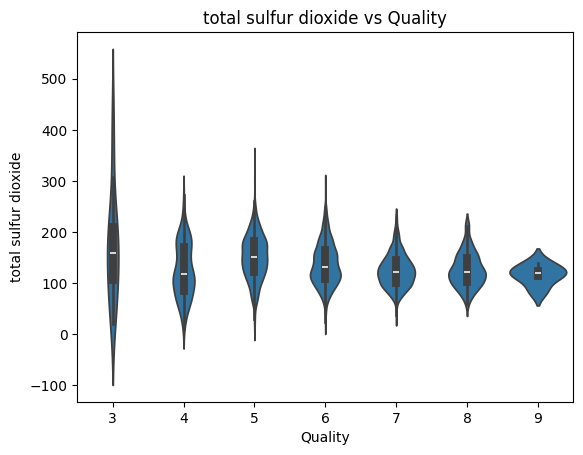

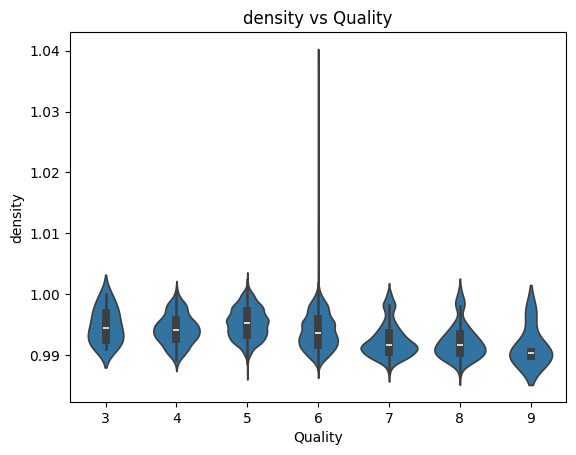

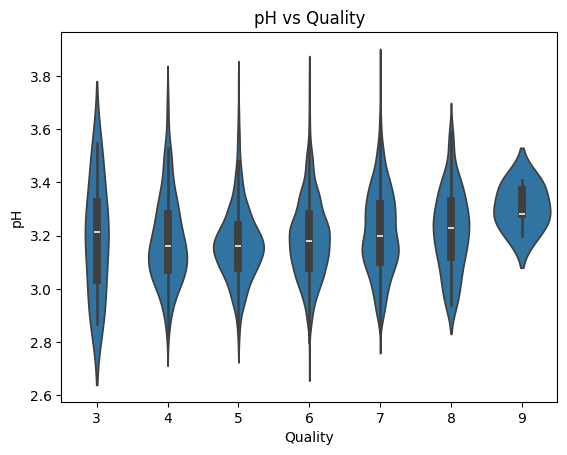

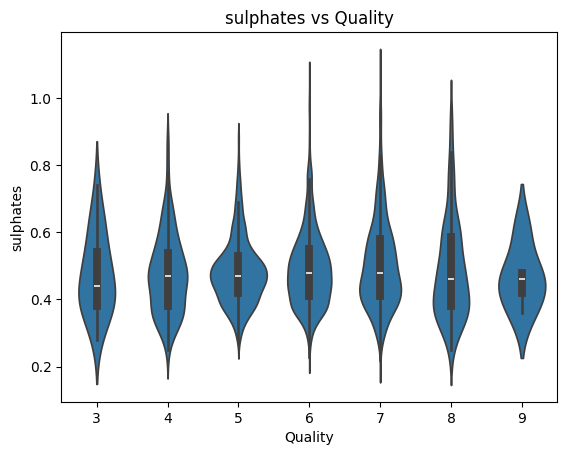

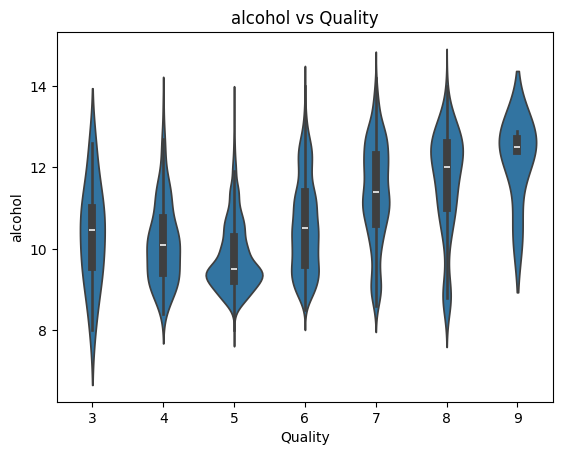

In [47]:
#4 Dropping the 'quality' column to focus on the features
features = white_wine_df.columns.drop('quality')

# Loop through each feature and create a violin plot
for feature in features:
    sns.violinplot(data=white_wine_df, x='quality', y=feature)
    plt.title(f'{feature} vs Quality')
    plt.xlabel('Quality')
    plt.ylabel(feature)
    plt.show()



Intercept: 2.58
Coefficient: 0.31
RMSE: 0.80
R^2: 0.19


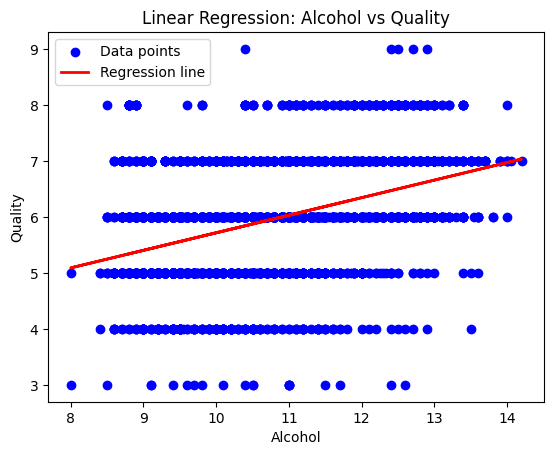

In [48]:
#question 5

# Select 'alcohol' as the input feature and 'quality' as the target
X = white_wine_df[['alcohol']]
y = white_wine_df['quality']

# Create and train the linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Calculate metrics
intercept = model.intercept_
coefficient = model.coef_[0]
rmse = np.sqrt(mean_squared_error(y, y_pred))
r2 = r2_score(y, y_pred)

# Print the metrics
print(f'Intercept: {intercept:.2f}')
print(f'Coefficient: {coefficient:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'R^2: {r2:.2f}')

# Plot data points and regression line
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, y_pred, color='red', linewidth=2, label='Regression line')
plt.xlabel('Alcohol')
plt.ylabel('Quality')
plt.title('Linear Regression: Alcohol vs Quality')
plt.legend()
plt.show()

In [49]:
print(white_wine_df.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [50]:
#question 6
# Select input features and target
X = white_wine_df[['volatile acidity', 'alcohol', 'density']]
y = white_wine_df['quality']

# Create and train the linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Calculate metrics
intercept = model.intercept_
coefficients = model.coef_
rmse = np.sqrt(mean_squared_error(y, y_pred))
r2 = r2_score(y, y_pred)

# Print the metrics
print(f'Intercept: {intercept:.4f}')
print('Coefficients:')
print(f'  Volatile Acidity: {coefficients[0]:.4f}')
print(f'  Alcohol: {coefficients[1]:.4f}')
print(f'  Density: {coefficients[2]:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'R^2: {r2:.4f}')

Intercept: -36.4986
Coefficients:
  Volatile Acidity: -2.0721
  Alcohol: 0.3989
  Density: 38.9919
RMSE: 0.7685
R^2: 0.2469
